**Warning**: All this work did not consider some things that were not available in the data: For example, we do not take into account the total number of drivers that go into barcelona, and which percetage of those profiles have accidents. We only calculate it over the total of accidents, which is the only data that we have.

# Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (10, 10)

In [3]:
df = pd.read_csv('../data/final/featured.csv')

## Identification of variables and data types

In [4]:
df.head()

,Número d'expedient,any,tipus_vehicle,marca,color_vehicle,tipus_carnet,expertesa_carnet,genere,edat
0,2010S000001,2010,Motocicleta,KAWASAKI,Negre,A,20,Home,30
1,2010S000002,2010,Ciclomotor,PEUGEOT,Negre,B,2,Home,39
2,2010S000005,2010,Motocicleta,HONDA,Blau,A,16,Home,34
3,2010S000006,2010,Turismo,CITROEN,Blau,B,14,Dona,32
4,2010S000009,2010,Motocicleta,KYMCO,Gris,B,24,Home,43


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27355 entries, 0 to 27354
Data columns (total 9 columns):
Número d'expedient    27355 non-null object
any                   27355 non-null int64
tipus_vehicle         27355 non-null object
marca                 27355 non-null object
color_vehicle         27355 non-null object
tipus_carnet          27355 non-null object
expertesa_carnet      27355 non-null int64
genere                27355 non-null object
edat                  27355 non-null int64
dtypes: int64(3), object(6)
memory usage: 1.9+ MB


## Non-Graphical Univariate Analysis

In [6]:
print(df.tipus_vehicle.unique())
print(df.marca.unique())
print(df.color_vehicle.unique())
print(df.tipus_carnet.unique())
print(df.genere.unique())

['Motocicleta' 'Ciclomotor' 'Turismo' 'Taxi' 'Furgoneta' 'Camión > 3,5 Tm'
 'Autobús' 'Todo terreno' 'Camión <= 3,5 Tm' 'Tractocamión'
 'Cuadriciclo >=75cc' 'Otros veh¡c. a motor' 'Bicicleta'
 'Autobús articulado' 'Tranv¡a o tren' 'Autocar' 'Autocaravana'
 'Cuadriciclo <75cc' 'Maquinaria de obras' 'Otros vehíc. a motor'
 'Microbus <=17 plazas']
['KAWASAKI' 'PEUGEOT' 'HONDA' 'CITROEN' 'KYMCO' 'SKODA' 'PIAGGIO'
 'ALFA ROMEO' 'SEAT' 'RENAULT' 'SUZUKI' 'MERCEDES' 'APRILIA' 'VOLKSWAGEN'
 'MINI' 'AUDI' 'FORD' 'IVECO FIAT' 'YAMAHA' 'MAZDA' 'FIAT' 'MAN' 'HYUNDAI'
 'OPEL' 'NISSAN' 'KTM' 'VOLVO' 'VESPA' 'KIA' 'HARLEY DAVIDSON' 'BMW'
 'TOYOTA' 'MITSUBISHI' 'SAAB' 'SYM' 'CSR' 'MERCEDES-BENZ' 'GILERA' 'DERBI'
 'ROVER' 'MOTOR HISPANIA' 'LEXUS' 'CPI' 'SMART' 'TRIUMPH' 'DAF-HERMANNS'
 'BUELL' 'DUCATI' 'HYOSUNG' 'DAEWOO' 'MASERATI' 'DAELIM' 'PORSCHE' 'MACAL'
 'LAND ROVER' 'YIYING' 'MBK' 'RIEJU' 'TGB' 'SCANIA' 'JEEP' 'HAOTIAN'
 'Desconegut' 'CHEVROLET' 'CHRYSLER' 'PEGASO' 'KEEWAY' 'DODGE' 'AIYUMO'
 'SSA

In [7]:
df.drop(df.loc[df.tipus_vehicle=='Otros veh¡c. a motor'].index, inplace=True, errors='ignore')
df.drop(df.loc[df.tipus_vehicle=='Otros vehíc. a motor'].index, inplace=True, errors='ignore')
df.drop(df.loc[df.tipus_vehicle=='Microbus <=17 plazas'].index, inplace=True, errors='ignore')
df.drop(df.loc[df.tipus_vehicle=='Autobús'].index, inplace=True, errors='ignore')
df.drop(df.loc[df.tipus_vehicle=='Autocar'].index, inplace=True, errors='ignore')
df.drop(df.loc[df.tipus_vehicle=='Tractocamión'].index, inplace=True, errors='ignore')
df.drop(df.loc[df.tipus_vehicle=='Autobús articulado'].index, inplace=True, errors='ignore')
df.drop(df.loc[df.tipus_vehicle=='Microbus <=17 plazas'].index, inplace=True, errors='ignore')
df.drop(df.loc[df.tipus_vehicle=='Maquinaria de obras'].index, inplace=True, errors='ignore')
df.drop(df.loc[df.tipus_vehicle=='Tranvía o tren'].index, inplace=True, errors='ignore')
df.drop(df.loc[df.color_vehicle=='Desconegut'].index, inplace=True, errors='ignore')
df.drop(df.loc[df.tipus_carnet=='Desconegut'].index, inplace=True, errors='ignore')
df.drop(df.loc[df.tipus_carnet=='Llicència'].index, inplace=True, errors='ignore')
df.drop(df.loc[df.tipus_carnet=='Llic\x8ancia'].index, inplace=True, errors='ignore')
df.drop(df.loc[df.tipus_carnet=='BTP'].index, inplace=True, errors='ignore') # This license does not exist anymore

## Graphical Univariate Analysis

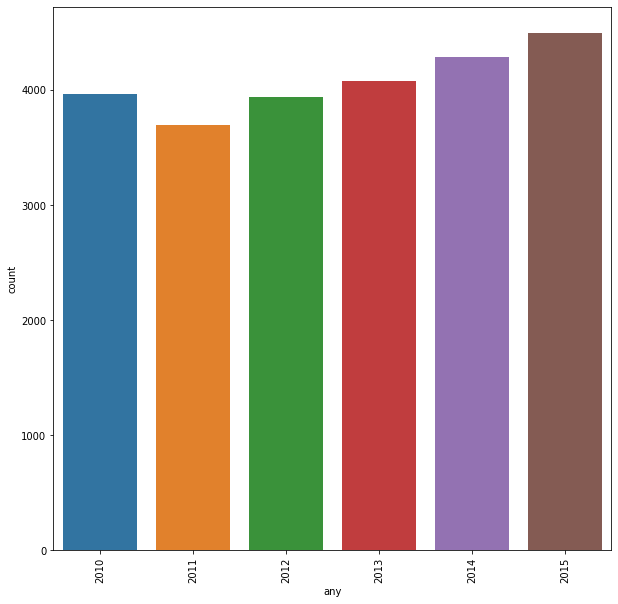

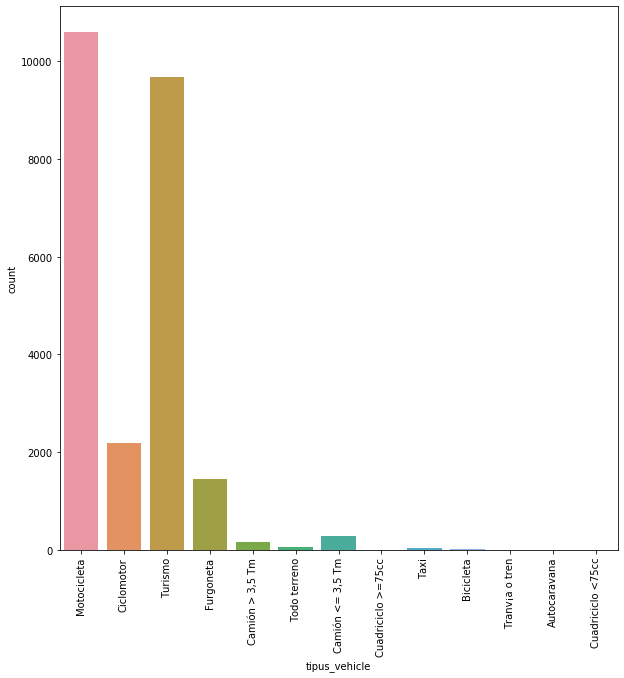

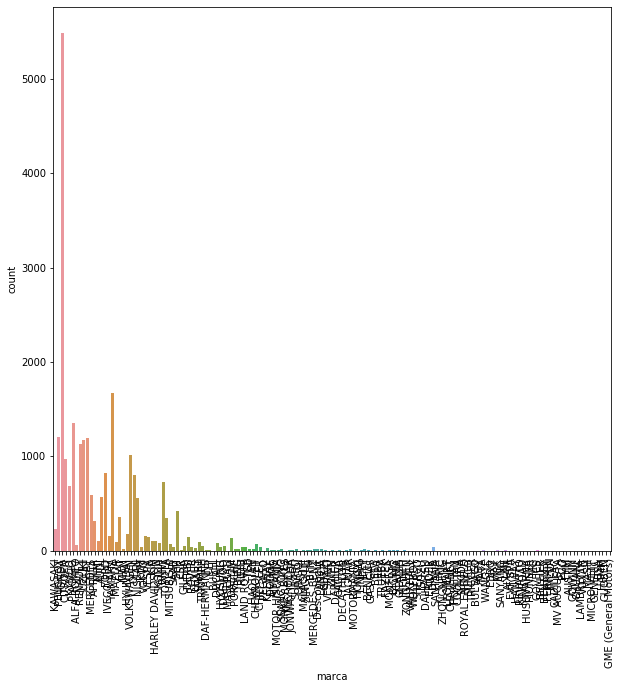

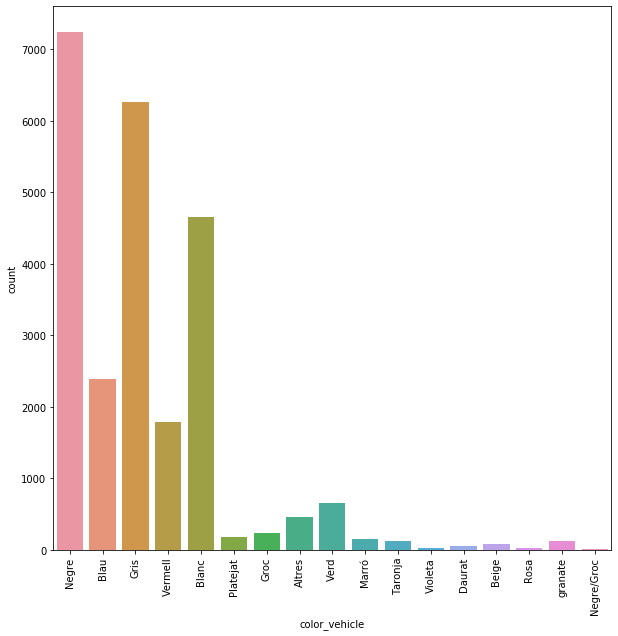

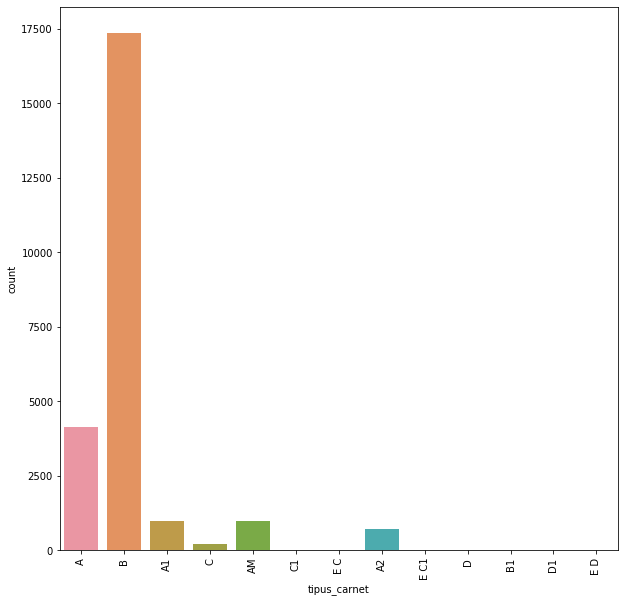

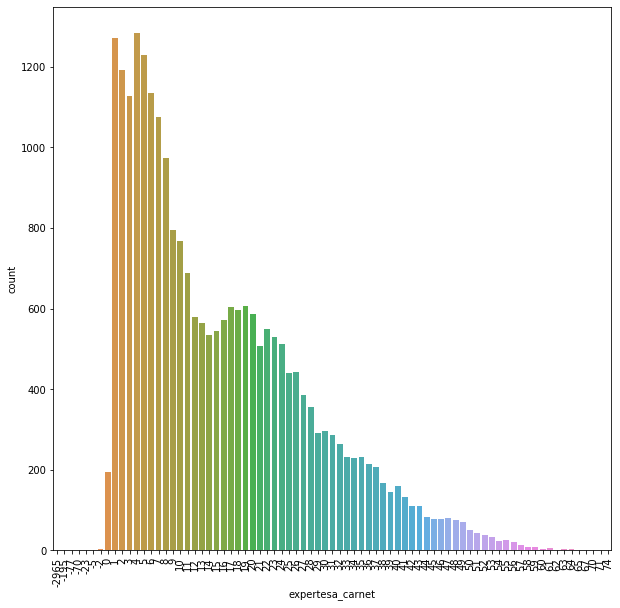

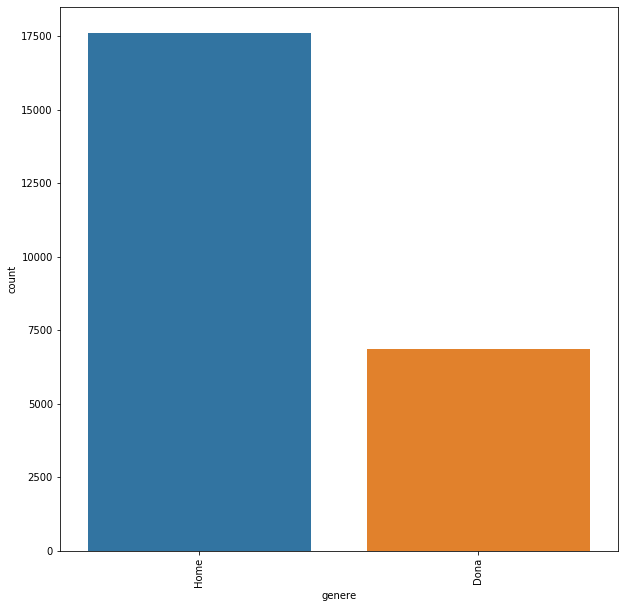

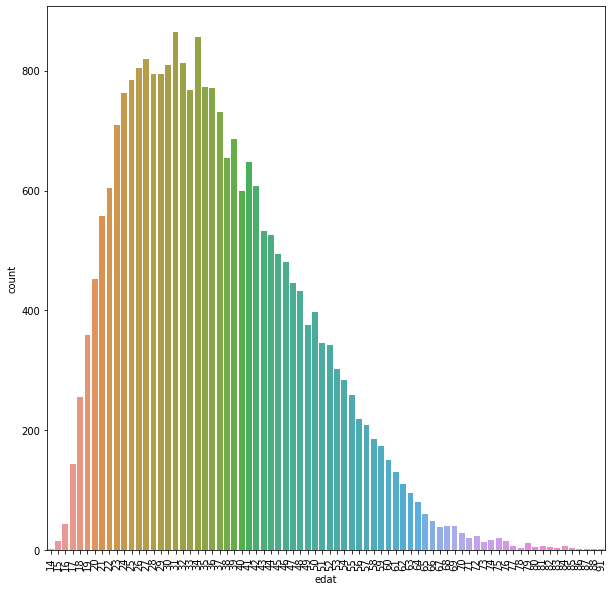

In [8]:
for col in df.columns[1:]:
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=90)
    plt.show()

It can be seen that there are some type of drivers that have way more accidents than the others, but this level of analysis is not accurate enough. For example, the gender bar plot tells us that men have more accidents than women, but the expertise plot tells us that a man with more expertise is not as dangerous as a woman with less expertise.

Furthermore, in the plot of age and expertise, we may appreciate different groups of people. For example, people with expertise of less than 5~6 years are the ones with more accidents, and people between 25 to 35 years are the ones with more accidents.
We will transform in the future this two variables, having range of ages, being a mean of accidents of all the ages in its range.

We also appreciate some range errors in the expertise variable, like having negative values. We will drop them.

In [9]:
df.drop(df.loc[df.expertesa_carnet<0].index, inplace=True, errors='ignore')

## Multivariate Analysis

In this section we must discover some group of profiles that may have more accidents than others. For example:
1. Brand with more accidents and being used by men or women.
2. Color with more accidents in each gender.
3. Brand with more accidents, being used by novel drivers and which gender.
4. Expertise and license type relation, which are the ones with more.
5. Number of accidents in a vehicle type given the gender.

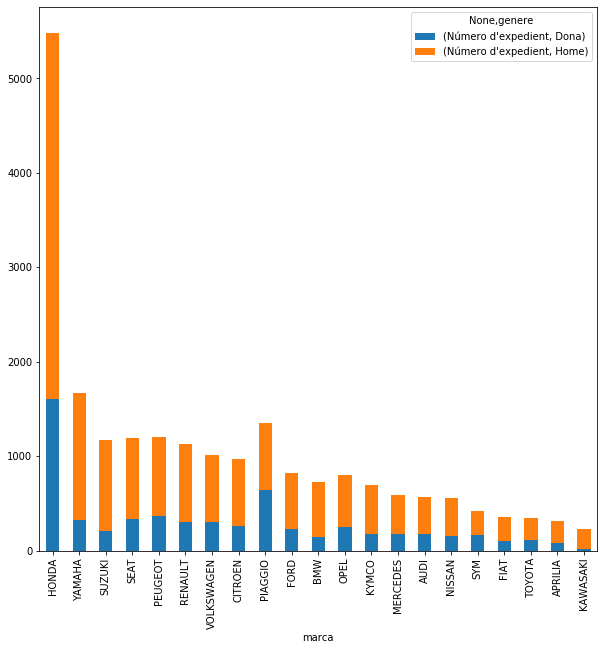

In [10]:
brand_gender = df.groupby(by=['marca', 'genere']).count()

brand_gender.drop(brand_gender.columns[1:], axis=1, inplace=True)
brand_gender.sort_values(by='Número d\'expedient',ascending=False, inplace=True)
brand_gender = brand_gender.loc[brand_gender.loc[brand_gender['Número d\'expedient']>150].index.get_level_values('marca')]
brand_gender.unstack().plot(kind='bar', stacked=True)

Here, we can observe generally men have more accidents than women with all brands, except in case of Piaggio (motorcycles). We alse must have into account that in some cases, the number of women who have accidents are less than 150, for example with KAWASAKI.

There are more brands, but the number of accidents are really small and they are difficult to appreciate in the plot.

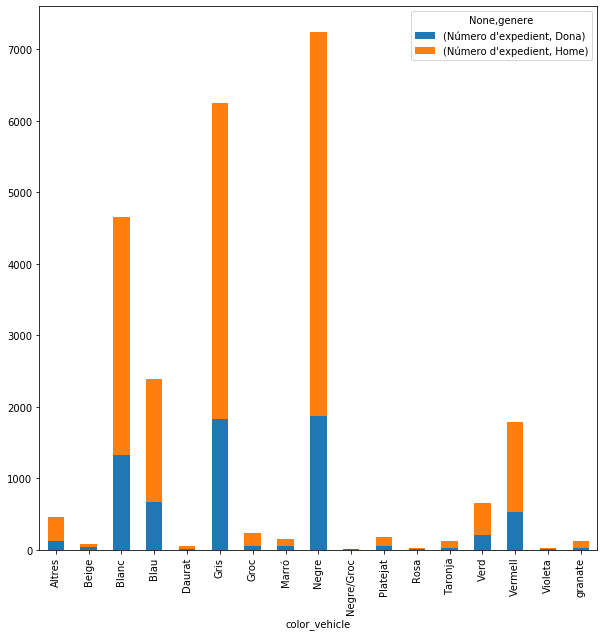

In [11]:
color_genre = df.groupby(by=['color_vehicle', 'genere']).count()

color_genre.drop(color_genre.columns[1:], axis=1, inplace=True)
color_genre.unstack().plot(kind='bar', stacked=True)

We may appreciate with all colors, both genders have accidents and with the most common acidents are with black and grey vehicles.

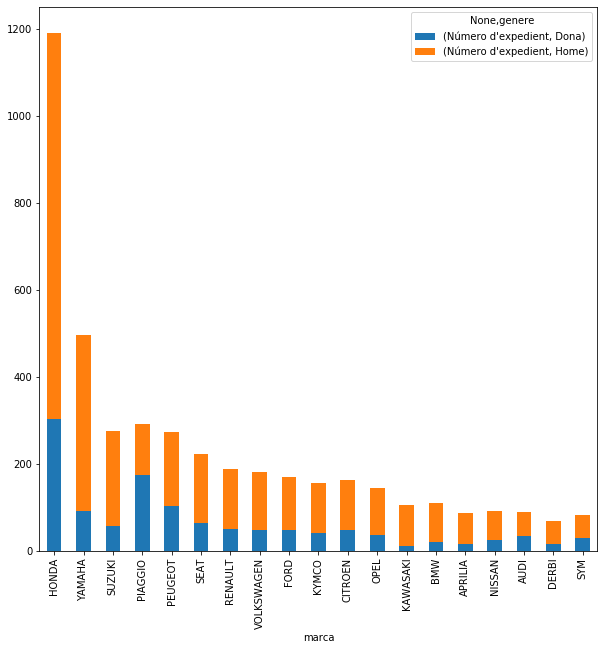

In [12]:
df_novel = df.loc[df['expertesa_carnet']<5]
brand_gender = df_novel.groupby(by=['marca', 'genere']).count()

brand_gender.drop(brand_gender.columns[1:], axis=1, inplace=True)
brand_gender.sort_values(by='Número d\'expedient',ascending=False, inplace=True)
brand_gender = brand_gender.loc[brand_gender.loc[brand_gender['Número d\'expedient']>50].index.get_level_values('marca')]
brand_gender.unstack().plot(kind='bar', stacked=True)

Making the comparison with the previous plot (brand/gender), we can observe as in the previous one with almost all brands, who have more accidents are men, except with Piaggio (when it was almost the same number in both cases). When drivers are novel, we may see who has more accidents with Piaggio vehicles are women.

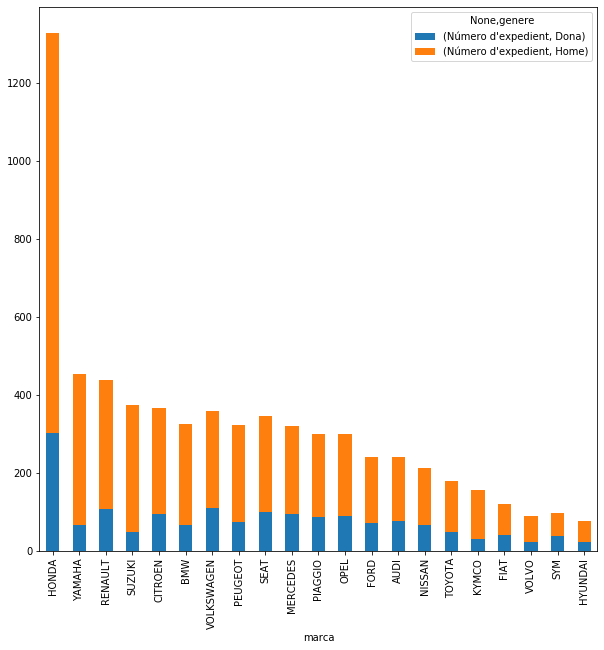

In [13]:
df_expert = df.loc[df['expertesa_carnet']>20]
brand_gender = df_expert.groupby(by=['marca', 'genere']).count()

brand_gender.drop(brand_gender.columns[1:], axis=1, inplace=True)
brand_gender.sort_values(by='Número d\'expedient',ascending=False, inplace=True)
brand_gender = brand_gender.loc[brand_gender.loc[brand_gender['Número d\'expedient']>50].index.get_level_values('marca')]
brand_gender.unstack().plot(kind='bar', stacked=True)

We may appreciate difference between this two last plots. Men have more accidents when using Piaggio than women (in the case of expert drivers). Also, the number of accidents in expensive brands (mercedes, audi...) increase in both genders when the expertise is bigger (but this may be related to the age of the driver).

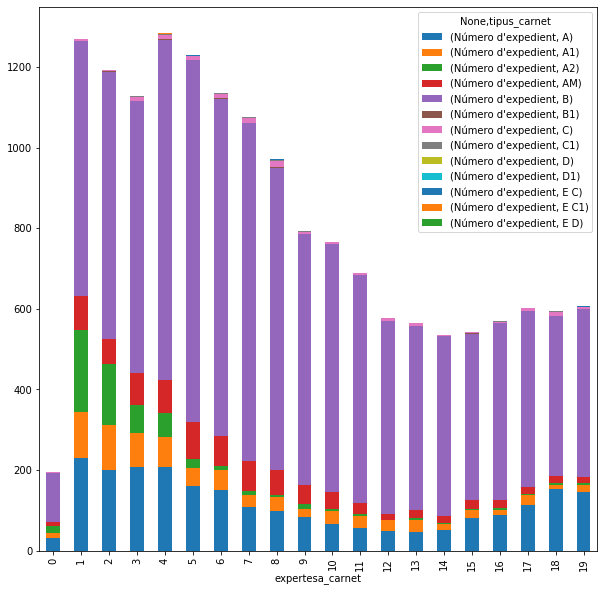

In [14]:
type_expertise = df.groupby(by=['expertesa_carnet', 'tipus_carnet']).count()

type_expertise.drop(type_expertise.columns[1:], axis=1, inplace=True)
type_expertise.sort_values(by='expertesa_carnet', ascending=True, inplace=True)
type_expertise = type_expertise.loc[type_expertise.index.get_level_values('expertesa_carnet')<20]
type_expertise.unstack().plot(kind='bar', stacked=True)

We can appreciate that the B license is the one with more accidents, always. It is also the most widely used license, so it is normal. The licenses A, A1, A2 and AM are the others with more accidents, being licenses for motorcycles. Important, there are a lot of accidents for AM licenses, which is the license for <50cc mopeds. This licence is used mostly by teens, but the level of expertise tells us that adults also have a lot of accidents with this license.

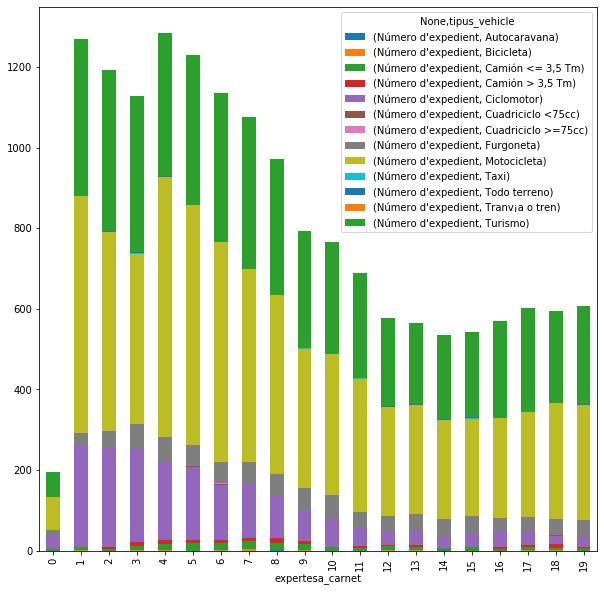

In [15]:
expertesa_tipus_vehicle = df.groupby(by=['expertesa_carnet', 'tipus_vehicle']).count()

expertesa_tipus_vehicle.drop(expertesa_tipus_vehicle.columns[1:], axis=1, inplace=True)
expertesa_tipus_vehicle.sort_values(by='expertesa_carnet', ascending=True, inplace=True)
expertesa_tipus_vehicle = expertesa_tipus_vehicle.loc[expertesa_tipus_vehicle.index.get_level_values('expertesa_carnet')<20]
expertesa_tipus_vehicle.unstack().plot(kind='bar', stacked=True)

As we can see, vehicles, motorcycles, vans and mopeds are the cause of the majority of accidents. The problem is that we cannot use this information when identifying profile, because we do not have the total number of licenses for each type of vehicle, only the accident numbers.

Moreover, it can be appreciated how the expertise decreases the number of accidents. The exception is the expertise of less than 1 year, where drivers do not have a lot of accidents.

## Variable transformations

First of all, we need to transform the age of the drivers and the expertise. This transformation will categoryse the age into different ages. We will not not only create a variable range, we will also save the mean of accidents in this range.

For example, given people of age from 24 to 36, we know there are a lot of accidents each year in this range. If we group them and count the number of accidents, the difference with other ranges will be too big. The solution in this case is to work with the mean of accidents in each selected range. This will be of huge importance when selecting the objective variable.

In [16]:
def age_definer(row):
    if row <= 23:
        return 0
    elif row <= 36:
        return 1
    elif row <= 50:
        return 2
    else:
        return 3


df['accidents_edat'] = 0
df.loc[df.edat<=23, 'accidents_edat'] = df.loc[df.edat<=23].groupby('edat').count().mean()[0]
df.loc[(df.edat>23) & (df.edat<=36), 'accidents_edat'] = df.loc[(df.edat>23) & (df.edat<=36)].groupby('edat').count().mean()[0]
df.loc[(df.edat>36) & (df.edat<=50), 'accidents_edat'] = df.loc[(df.edat>36) & (df.edat<=50)].groupby('edat').count().mean()[0]
df.loc[df.edat>50, 'accidents_edat'] = df.loc[df.edat>50].groupby('edat').count().mean()[0]
df['range_edat'] = df.edat.apply(age_definer)

In [17]:
df.head()

,Número d'expedient,any,tipus_vehicle,marca,color_vehicle,tipus_carnet,expertesa_carnet,genere,edat,accidents_edat,range_edat
0,2010S000001,2010,Motocicleta,KAWASAKI,Negre,A,20,Home,30,800.461538,1
1,2010S000002,2010,Ciclomotor,PEUGEOT,Negre,B,2,Home,39,543.571429,2
2,2010S000005,2010,Motocicleta,HONDA,Blau,A,16,Home,34,800.461538,1
3,2010S000006,2010,Turismo,CITROEN,Blau,B,14,Dona,32,800.461538,1
4,2010S000009,2010,Motocicleta,KYMCO,Gris,B,24,Home,43,543.571429,2


<BarContainer object of 24462 artists>

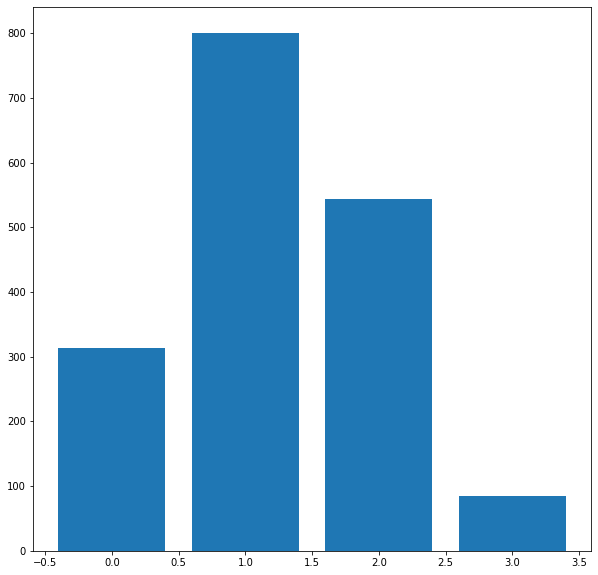

In [18]:
plt.bar(df.range_edat, df.accidents_edat)

We will follow the same strategy, but now with expertise.

In [19]:
#expertesa
def expertise_definer(row):
    if row <= 5:
        return 0
    elif row <= 15:
        return 1
    elif row <= 35:
        return 2
    else:
        return 3
    
df['accidents_expertesa'] = 0
df.loc[df.expertesa_carnet<=5, 'accidents_expertesa'] = df.loc[df.expertesa_carnet<=5].groupby('expertesa_carnet').count().mean()[0]
df.loc[(df.expertesa_carnet>5) & (df.expertesa_carnet<=15), 'accidents_expertesa'] = df.loc[(df.expertesa_carnet>5) & (df.expertesa_carnet<=15)].groupby('expertesa_carnet').count().mean()[0]
df.loc[(df.expertesa_carnet>15) & (df.expertesa_carnet<=35), 'accidents_expertesa'] = df.loc[(df.expertesa_carnet>15) & (df.expertesa_carnet<=35)].groupby('expertesa_carnet').count().mean()[0]
df.loc[df.expertesa_carnet>35, 'accidents_expertesa'] = df.loc[df.expertesa_carnet>35].groupby('expertesa_carnet').count().mean()[0]
df['range_expertesa'] = df.expertesa_carnet.apply(expertise_definer)
df.drop('expertesa_carnet', axis=1, inplace=True)

<BarContainer object of 24462 artists>

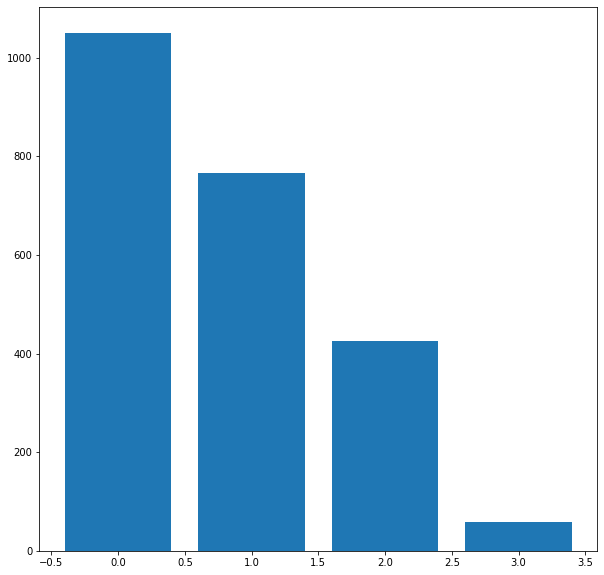

In [20]:
plt.bar(df.range_expertesa, df.accidents_expertesa)

Another variable that needs a transformation is the brand of a car. There are some minoritary brands that have an irrelevant number of accidents, and brands that have a high number of accidents. We will divide the brands in types of dangers.

In [21]:
marca_count = df.groupby('marca').count().iloc[:, 0]
marca_count.rename("marca_count", inplace=True)
df = df.merge(marca_count, how='inner', left_on='marca', right_on='marca')

In [22]:
def danger_definer(row):
    if row < 100:
        return 0
    elif row < 700:
        return 1
    else:
        return 2

df['brand_danger'] = df.marca_count.apply(danger_definer)

<BarContainer object of 24462 artists>

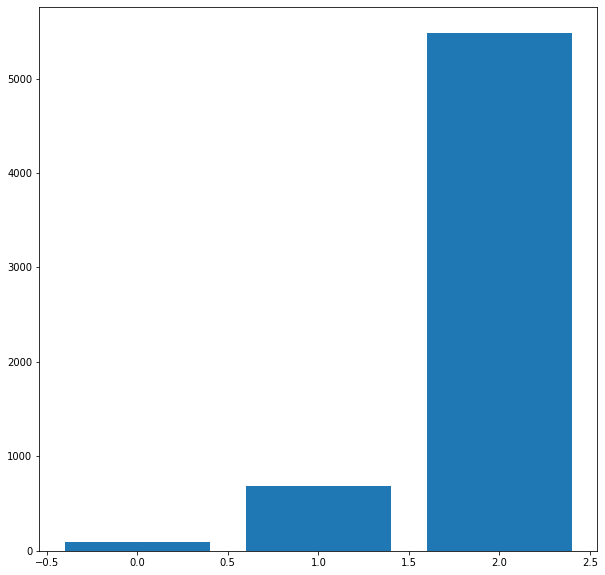

In [23]:
plt.bar(df.brand_danger, df.marca_count)

Finally we are goint o build an objective variable. This objective variable is going to be the average percentage of different groups. The objective is to define the risk of a register.

In [24]:
df.head()

,Número d'expedient,any,tipus_vehicle,marca,color_vehicle,tipus_carnet,genere,edat,accidents_edat,range_edat,accidents_expertesa,range_expertesa,marca_count,brand_danger
0,2010S000001,2010,Motocicleta,KAWASAKI,Negre,A,Home,30,800.461538,1,425.750000,2,232,1
1,2010S000229,2010,Motocicleta,KAWASAKI,Vermell,A,Home,46,543.571429,2,765.600000,1,232,1
2,2010S000496,2010,Motocicleta,KAWASAKI,Blau,A,Home,26,800.461538,1,1050.333333,0,232,1
3,2010S000762,2010,Motocicleta,KAWASAKI,Negre,A,Home,32,800.461538,1,765.600000,1,232,1
4,2010S000775,2010,Motocicleta,KAWASAKI,Verd,A,Home,28,800.461538,1,1050.333333,0,232,1


In [25]:
def calculate_percentage(serie):
    total = len(serie)
    a = serie.groupby(serie).apply(lambda x: x.shape[0] / total)
    return serie.apply(lambda x: a.loc[x])

In [26]:
df['y'] = (calculate_percentage(df["tipus_vehicle"]) + calculate_percentage(df["color_vehicle"]) + 
calculate_percentage(df["tipus_carnet"]) + calculate_percentage(df["genere"]) + calculate_percentage(df["range_edat"]) +
calculate_percentage(df["range_expertesa"]) + calculate_percentage(df["brand_danger"])) / 7

In [27]:
df['y'].describe()

count    24462.000000
mean         0.409289
std          0.066684
min          0.107093
25%          0.366399
50%          0.416039
75%          0.455827
max          0.521304
Name: y, dtype: float64

In [28]:
df.drop(["Número d'expedient", 'any', 'edat', 'accidents_edat', 'accidents_expertesa', 'marca_count'], axis=1, inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24462 entries, 0 to 24461
Data columns (total 9 columns):
tipus_vehicle      24462 non-null object
marca              24462 non-null object
color_vehicle      24462 non-null object
tipus_carnet       24462 non-null object
genere             24462 non-null object
range_edat         24462 non-null int64
range_expertesa    24462 non-null int64
brand_danger       24462 non-null int64
y                  24462 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 2.5+ MB


In [30]:
from sklearn.preprocessing import LabelEncoder
df_ = df.copy()
le = LabelEncoder()
df_['tipus_vehicle'] = le.fit_transform(df_['tipus_vehicle'])
df_['marca'] = le.fit_transform(df_['marca'])
df_['color_vehicle'] = le.fit_transform(df_['color_vehicle'])
df_['tipus_carnet'] = le.fit_transform(df_['tipus_carnet'])
df_['genere'] = le.fit_transform(df_['genere'])

A final step. For the variables, we are going to transform them using the OneHotEncoder class in sklearn. 

In [31]:
df = pd.concat([df, pd.get_dummies(df['tipus_vehicle'])], axis=1, sort=False)
df = pd.concat([df, pd.get_dummies(df['marca'])], axis=1, sort=False)
df = pd.concat([df, pd.get_dummies(df['color_vehicle'])], axis=1, sort=False)
df = pd.concat([df, pd.get_dummies(df['tipus_carnet'])], axis=1, sort=False)
df = pd.concat([df, pd.get_dummies(df['genere'])], axis=1, sort=False)
df = pd.concat([df, pd.get_dummies(df['range_edat'], prefix='range_edat')], axis=1, sort=False)
df = pd.concat([df, pd.get_dummies(df['range_expertesa'], prefix='range_expertesa')], axis=1, sort=False)
df = pd.concat([df, pd.get_dummies(df['brand_danger'], prefix='brand_danger')], axis=1, sort=False)
df.drop(['tipus_vehicle', 'marca', 'color_vehicle', 'tipus_carnet', 'genere', 'range_edat', 'range_expertesa', 'brand_danger'], axis=1, inplace=True)

In [32]:
df.head()

,y,Autocaravana,Bicicleta,"Camión <= 3,5 Tm","Camión > 3,5 Tm",Ciclomotor,Cuadriciclo <75cc,Cuadriciclo >=75cc,Furgoneta,Motocicleta,...,range_edat_1,range_edat_2,range_edat_3,range_expertesa_0,range_expertesa_1,range_expertesa_2,range_expertesa_3,brand_danger_0,brand_danger_1,brand_danger_2
0,0.372718,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
1,0.319569,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
2,0.331435,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
3,0.367702,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
4,0.321332,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0


## Correlation Analysis

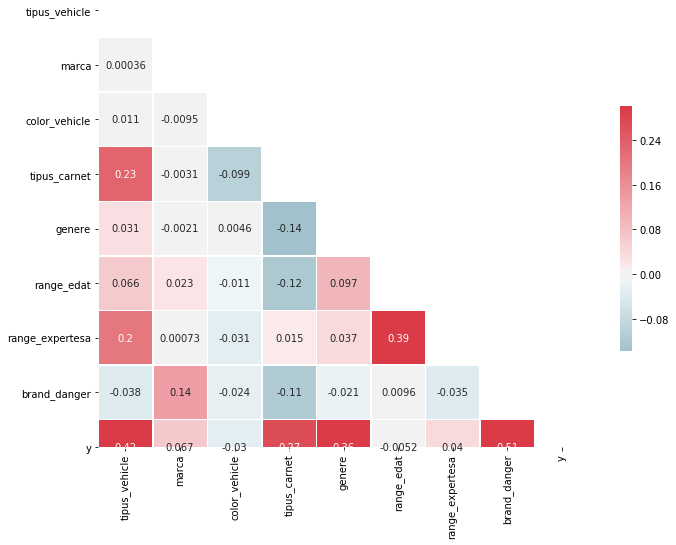

In [33]:
corr = df_.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In the correlation matrix, the vehicle type, the type of license, gender and brand are the most important variables. We will also keep the other variables, because we do not have a lot of variables.

## Machine Learning

Since one of the requirements for the project was to use pyspark in the machine learning part, we are going to transform the pandas dataframe into spark dataframe and start to work with it. 

In [34]:
import pyspark
import os
# make sure pyspark tells workers to use python3 not 2 if both are installed\n",
os.environ["PYSPARK_PYTHON"] = "python3"
spark_home = 'C:\spark\spark-2.4.4-bin-hadoop2.7'

In [35]:
sc = pyspark.SparkContext('local[*]')

In [36]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [40]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
data = sqlContext.createDataFrame(df)

In order to train the algorithm, we are going to split the data into 70% train and 30% test. We are going to use a simple LinearRegression

In [80]:
from pyspark.mllib.regression import LabeledPoint, LinearRegressionWithSGD
from pyspark.mllib.evaluation import RegressionMetrics

parsedData = data.rdd.map(lambda line: LabeledPoint(line[0], line[1:]))

train, test = parsedData.randomSplit(weights=[0.7, 0.3], seed=1)

model = LinearRegressionWithSGD.train(train)

In [81]:
valuesAndPreds = test.map(lambda p: (float(model.predict(p.features)), p.label))

metrics = RegressionMetrics(valuesAndPreds)
# Squared Error
print("MSE = %s" % metrics.meanSquaredError)
print("RMSE = %s" % metrics.rootMeanSquaredError)

# R-squared
print("R-squared = %s" % metrics.r2)

# Mean absolute error
print("MAE = %s" % metrics.meanAbsoluteError)

MSE = 2.197258936425818e-05
RMSE = 0.004687492865515443
R-squared = 0.9950924587882233
MAE = 0.0037822890471790192


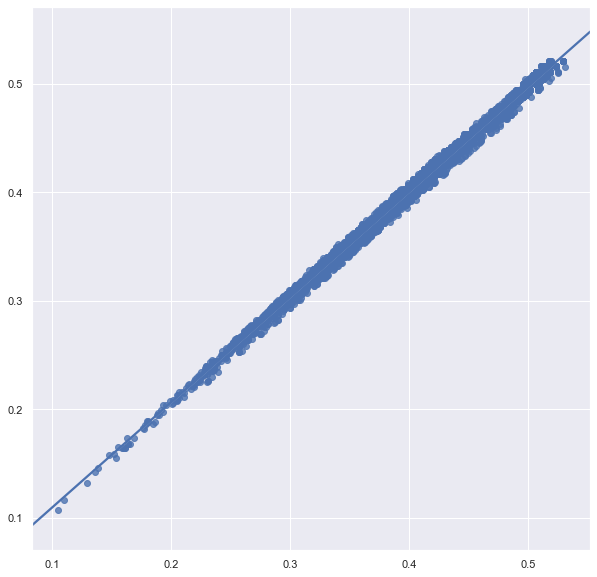

In [85]:
results = valuesAndPreds.collect()

pred, true = list(list(zip(*results))[0]), list(list(zip(*results))[1])

import seaborn as sns
sns.set(color_codes=True)
ax = sns.regplot(x=pred, y=true)

As we can see, we have an almost perfect R2 and really low errors. Why do we have excellent metrics? When we created our objective variable, we used percentage of accidents involving the categories in each feature. The model only needs to represent this percentage in order to predict perfectly the objective variable. 